In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pymcaspec import specfile, get_T_ISR

%matplotlib widget

Check what temperatures were measured

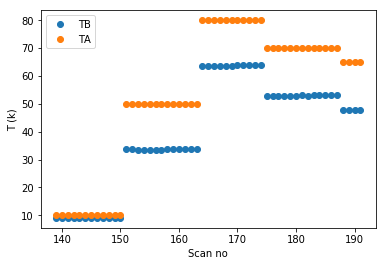

In [5]:
F = specfile('LO_20180704')
scan_nos = range(139, 192)

TBs, TAs = get_T_ISR(F[scan_nos])


fig, ax = plt.subplots()

ax.plot(scan_nos, TBs, 'o', label='TB')
ax.plot(scan_nos, TAs, 'o', label='TA')
ax.legend()
ax.set_xlabel('Scan no')
ax.set_ylabel('T (k)')

Tmin = np.min(TBs)
Tmax = np.max(TBs)

Plot everything

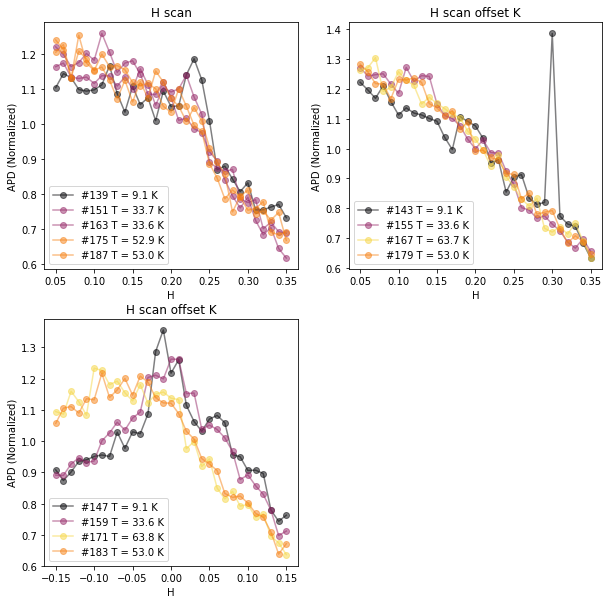

In [6]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

for scan_no in [139, 151, 163, 175, 187]:
    S = F[scan_no]
    H = S['H']
    TB, TA = get_T_ISR(S)
    APD = np.array([F[curr_scan_no]['APD'] for curr_scan_no in range(scan_no, scan_no+4)]).mean(0) / S['Seconds']
    
    APD = APD/APD.mean()
    
    color = mpl.cm.inferno( 0.9*(TB-Tmin)/(Tmax -Tmin) )  
    axs[0,0].plot(H, APD ,'o-', color=color[0], label="#{} T = {:.1f} K".format(scan_no, TB[0]), alpha=0.5)
    axs[0,0].set_title('H scan')
    axs[0,0].set_xlabel('H')
    axs[0,0].legend()
    
for scan_no in [139+4, 151+4, 163+4, 175+4]:
    S = F[scan_no]
    H = S['H']
    TB, TA = get_T_ISR(S)
    APD = np.array([F[curr_scan_no]['APD'] for curr_scan_no in range(scan_no, scan_no+4)]).mean(0) / S['Seconds']
    APD = APD/APD.mean()
    
    color = mpl.cm.inferno( 0.9*(TB-Tmin)/(Tmax -Tmin) )    
    axs[0,1].plot(H, APD ,'o-', color=color[0], label="#{} T = {:.1f} K".format(scan_no, TB[0]), alpha=0.5)
    axs[0,1].set_title('H scan offset K')
    axs[0,1].set_xlabel('H')
    axs[0,1].legend()
    
for scan_no in [139+8, 151+8, 163+8, 175+8]:
    S = F[scan_no]
    K = S['K']
    TB, TA = get_T_ISR(S)
    APD = np.array([F[curr_scan_no]['APD'] for curr_scan_no in range(scan_no, scan_no+4)]).mean(0) / S['Seconds']
    APD = APD/APD.mean()
    
    color = mpl.cm.inferno( 0.9*(TB-Tmin)/(Tmax -Tmin) )  
    axs[1,0].plot(K, APD ,'o-', color=color[0], label="#{} T = {:.1f} K".format(scan_no, TB[0]), alpha=0.5)
    axs[1,0].set_title('H scan offset K')
    axs[1,0].set_xlabel('H')
    axs[1,0].legend()
    
    
_ = [ax.set_ylabel('APD (Normalized)') for ax in axs.ravel()]
axs[1,1].remove()